In [178]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU, Conv1D, TimeDistributed, LSTM
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.regularizers import l2

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/2020_la_solar_intensity.csv', index_col='Unnamed: 0')
df.index.name= 'Date'
df.head()

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,DNI,Fill Flag,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,1,1,0,0,8.9,0,0,0,0,...,0,0,0,61.42,168.96,0.14,993,0.9,66,2.6
2020-01-01 00:30:00,2020,1,1,0,30,8.8,0,0,0,0,...,0,0,0,61.84,166.75,0.14,993,1.0,65,2.6
2020-01-01 01:00:00,2020,1,1,1,0,8.7,0,0,0,0,...,0,0,0,61.57,162.24,0.14,993,1.0,64,2.5
2020-01-01 01:30:00,2020,1,1,1,30,8.7,0,0,0,0,...,0,0,0,61.57,156.75,0.14,993,1.0,60,2.5
2020-01-01 02:00:00,2020,1,1,2,0,8.6,0,0,0,0,...,0,0,0,61.52,150.84,0.14,993,1.0,55,2.5


In [3]:
new_cols = [col.lower().replace(' ', '_') for col in df.columns]
df.columns = new_cols

In [4]:
df.head()

,year,month,day,hour,minute,temperature,clearsky_dhi,clearsky_dni,clearsky_ghi,cloud_type,...,dni,fill_flag,ghi,relative_humidity,solar_zenith_angle,surface_albedo,pressure,precipitable_water,wind_direction,wind_speed
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,2020,1,1,0,0,8.9,0,0,0,0,...,0,0,0,61.42,168.96,0.14,993,0.9,66,2.6
2020-01-01 00:30:00,2020,1,1,0,30,8.8,0,0,0,0,...,0,0,0,61.84,166.75,0.14,993,1.0,65,2.6
2020-01-01 01:00:00,2020,1,1,1,0,8.7,0,0,0,0,...,0,0,0,61.57,162.24,0.14,993,1.0,64,2.5
2020-01-01 01:30:00,2020,1,1,1,30,8.7,0,0,0,0,...,0,0,0,61.57,156.75,0.14,993,1.0,60,2.5
2020-01-01 02:00:00,2020,1,1,2,0,8.6,0,0,0,0,...,0,0,0,61.52,150.84,0.14,993,1.0,55,2.5


In [5]:
df.isnull().sum()

year                  0
month                 0
day                   0
hour                  0
minute                0
temperature           0
clearsky_dhi          0
clearsky_dni          0
clearsky_ghi          0
cloud_type            0
dew_point             0
dhi                   0
dni                   0
fill_flag             0
ghi                   0
relative_humidity     0
solar_zenith_angle    0
surface_albedo        0
pressure              0
precipitable_water    0
wind_direction        0
wind_speed            0
dtype: int64

In [6]:
df.columns

Index(['year', 'month', 'day', 'hour', 'minute', 'temperature', 'clearsky_dhi',
       'clearsky_dni', 'clearsky_ghi', 'cloud_type', 'dew_point', 'dhi', 'dni',
       'fill_flag', 'ghi', 'relative_humidity', 'solar_zenith_angle',
       'surface_albedo', 'pressure', 'precipitable_water', 'wind_direction',
       'wind_speed'],
      dtype='object')

In [115]:
features = ['temperature', 'wind_speed', 'pressure', 'solar_zenith_angle', 'relative_humidity', 'surface_albedo']

In [164]:
X = df[features]
y = df['ghi']

In [117]:
def stack_sequences(X, y):
    X_list = []
    scaler = MinMaxScaler(feature_range=(0, 1))
    for col in X.columns:
        x1 = X[col].values
        x1 = x1.reshape(len(x1), 1)
        x1_ss = scaler.fit_transform(x1)
        X_list.append(x1_ss)
    y1 = y.values
    y1 = y1.reshape(len(y1), 1)
    y1_ss = scaler.fit_transform(y1)
    X_list.append(y1_ss)
    
    return np.hstack(X_list)

In [118]:
dataset_stacked = stack_sequences(X, y)

In [119]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
    # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out-1
    
    # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        
    # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
    
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

def split_sequences(sequences, n_steps_in, n_steps_out):
 X, y = list(), list()
 for i in range(len(sequences)):
  # find the end of this pattern
  end_ix = i + n_steps_in
  out_end_ix = end_ix + n_steps_out-1
  # check if we are beyond the dataset
  if out_end_ix > len(sequences):
   break
  # gather input and output parts of the pattern
  seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
  X.append(seq_x)
  y.append(seq_y)
 return np.array(X), np.array(y)

# choose a number of time steps #change this accordingly
n_steps_in, n_steps_out = 60 , 30
# covert into input/output
X, y = split_sequences(dataset_stacked, n_steps_in, n_steps_out)
print ("X.shape" , X.shape) 
print ("y.shape" , y.shape)

X.shape (17432, 60, 6)
y.shape (17432, 30)


In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2)

In [121]:
X_train.shape

(13945, 60, 6)

In [122]:
y_train.shape

(13945, 30)

In [156]:
model = Sequential()
model.add(layers.Input(shape=X_train.shape[1:]))

model.add(Conv1D(filters = 20, kernel_size=4, strides = 2, padding = 'same'))

model.add(GRU(50, return_sequences=True)) # True when next layer is RNN

model.add(GRU(50)) #, kernel_regularizer=l2(0.005)))

#model.add(Dropout(0.3))

model.add(Dense(n_steps_out))
model.add(layers.Activation('linear'))
# output layer

#model.add(Dense(1))

model.compile(loss = 'mse',
             optimizer = Adam(learning_rate=0.0001),
              metrics = ['mse'])

history = model.fit(X_train, y_train,
                   validation_data = (X_test, y_test),
                   epochs = 20, shuffle = False)

2023-05-12 01:13:18.104236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 01:13:18.106395: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 01:13:18.108016: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/20


2023-05-12 01:13:18.501501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 01:13:18.503464: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 01:13:18.505283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

433/436 [============================>.] - ETA: 0s - loss: 0.0729 - mse: 0.0729

2023-05-12 01:13:28.749635: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 01:13:28.751369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 01:13:28.752891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

436/436 [==============================] - 11s 17ms/step - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0319 - val_mse: 0.0319
Epoch 2/20
436/436 [==============================] - 7s 16ms/step - loss: 0.0302 - mse: 0.0302 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 3/20
436/436 [==============================] - 7s 16ms/step - loss: 0.0202 - mse: 0.0202 - val_loss: 0.0280 - val_mse: 0.0280
Epoch 4/20
436/436 [==============================] - 7s 16ms/step - loss: 0.0164 - mse: 0.0164 - val_loss: 0.0271 - val_mse: 0.0271
Epoch 5/20
436/436 [==============================] - 7s 17ms/step - loss: 0.0142 - mse: 0.0142 - val_loss: 0.0257 - val_mse: 0.0257
Epoch 6/20
436/436 [==============================] - 11s 24ms/step - loss: 0.0129 - mse: 0.0129 - val_loss: 0.0242 - val_mse: 0.0242
Epoch 7/20
436/436 [==============================] - 8s 19ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0226 - val_mse: 0.0226
Epoch 8/20
436/436 [==============================] - 7s 16ms/step - loss: 0.0

In [157]:
preds = model.predict(X_test)

2023-05-12 01:15:57.221684: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-05-12 01:15:57.224458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-05-12 01:15:57.226566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - 1s 4ms/step


In [158]:
preds.shape

(3487, 30)

In [159]:
y_test.shape

(3487, 30)

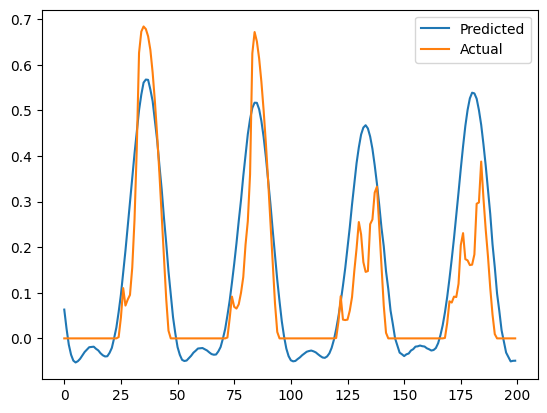

In [160]:
plt.plot(preds[:, 0][0:200], label='Predicted')
plt.plot(y_test[:, 0][0:200], label='Actual')
plt.legend();

In [161]:
r2_score(y_test[:, 0], preds[:, 0])

0.7678020032131142

## WaveNet Model

In [233]:
def univarite_sequence(n_steps_in, n_out, data):
    X = list()
    y = list()
    for i in range(len(data)):
        X.append(data[i:i+n_steps_in].values)
        y.append(data[i+n_steps_in:i+(n_steps_in + n_out)].values)
        if (i+n_steps_in+n_out) >= len(data):
            break
    return np.array(X), np.array(y)

steps_in = 720
steps_out = 48
X_new, y_new = univarite_sequence(steps_in, steps_out, df['ghi'])


In [234]:
train_X, test_X, train_y, test_y = train_test_split(X_new, y_new, shuffle=False)

In [235]:
ms = MinMaxScaler()
train_X_s = ms.fit_transform(train_X)
test_X_s = ms.transform(test_X)

m2 = MinMaxScaler()
train_y_s = ms.fit_transform(train_y)
test_y_s = ms.transform(test_y)


In [231]:
train_X_s.shape

(12564, 720)

In [237]:
train_X_s = np.array(train_X_s).reshape(len(train_X_s), steps_in, 1)
test_X_s = np.array(test_X_s).reshape(len(test_X_s), steps_in, 1)
train_y_s = np.array(train_y_s)
test_y_s = np.array(test_y_s)

In [209]:
# source: https://github.com/ageron/handson-ml2/blob/master/15_processing_sequences_using_rnns_and_cnns.ipynb
class GatedActivationUnit(keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'activation': self.activation,
        })
        return config 
    
    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate
        

def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal",
                            dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return keras.layers.Add()([z, inputs]), z
    

def wavenet_model_setup(n_layers_per_block, n_blocks, n_filters, n_outputs, feature_dim, name, last_activation='relu'):
    # n_layers_per_block = 10 in the paper
    # n_blocks = 3 in the paper
    # n_filters = 128 in the paper
    # n_outputs = 256 in the paper
    # last_activation determines the output codomain
    train_size = 120
    
    inputs = keras.layers.Input(shape=[train_size, feature_dim])
    z = keras.layers.Conv1D(n_filters, kernel_size=2, padding="causal")(inputs)
    skip_to_last = []
    for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
        z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
        skip_to_last.append(skip)
    z = keras.activations.relu(keras.layers.Add()(skip_to_last))
    z = keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
    out = keras.layers.Conv1D(n_outputs, kernel_size=1, activation=last_activation)(z)
    out = layers.Flatten()(out)
    out = Dense(48)(out)
    return keras.models.Model(inputs=[inputs], outputs=[out], name = name)

In [210]:
model_wave = wavenet_model_setup(10, 3, 128, 48, feature_dim=1, name='Wave', last_activation='linear')

In [211]:
model_wave.compile(loss="mse", optimizer="adam", metrics=['mae'])
history_wave = model_wave.fit(train_X_s, train_y_s, epochs=10,
                    validation_data=(test_X_s, test_y_s))

Epoch 1/10
407/407 [==============================] - 515s 1s/step - loss: 0.0199 - mae: 0.0748 - val_loss: 0.0052 - val_mae: 0.0491
Epoch 2/10
407/407 [==============================] - 507s 1s/step - loss: 0.0079 - mae: 0.0500 - val_loss: 0.0039 - val_mae: 0.0358
Epoch 3/10
407/407 [==============================] - 511s 1s/step - loss: 0.0075 - mae: 0.0478 - val_loss: 0.0040 - val_mae: 0.0348
Epoch 4/10
407/407 [==============================] - 512s 1s/step - loss: 0.0072 - mae: 0.0460 - val_loss: 0.0048 - val_mae: 0.0392
Epoch 5/10
407/407 [==============================] - 2201s 5s/step - loss: 0.0069 - mae: 0.0449 - val_loss: 0.0045 - val_mae: 0.0404
Epoch 6/10
407/407 [==============================] - 511s 1s/step - loss: 0.0065 - mae: 0.0441 - val_loss: 0.0043 - val_mae: 0.0401
Epoch 7/10
407/407 [==============================] - 513s 1s/step - loss: 0.0059 - mae: 0.0432 - val_loss: 0.0039 - val_mae: 0.0373
Epoch 8/10
407/407 [==============================] - 795s 2s/step -

In [ ]:
model_wave.summary

In [212]:
preds_wave = model_wave.predict(test_X_s)

136/136 [==============================] - 42s 299ms/step


In [213]:
r2_score(test_y_s[:, 0], preds_wave[:, 0])

0.9513966574754668

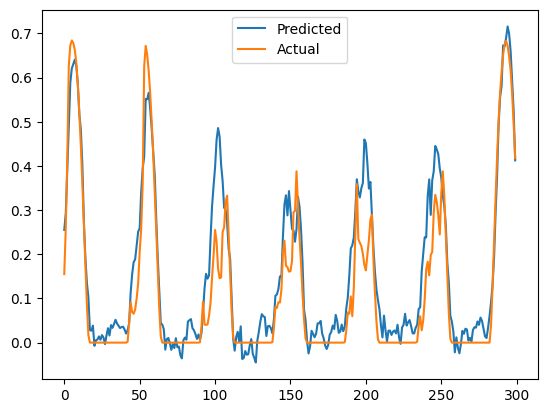

In [224]:
plt.plot(preds_wave[:, 0][900:1200], label='Predicted')
plt.plot(test_y_s[:, 0][900:1200], label='Actual')
plt.legend();

In [225]:
model_wave.summary()

Model: "Wave"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_31 (InputLayer)          [(None, 120, 1)]     0           []                               
                                                                                                  
 conv1d_438 (Conv1D)            (None, 120, 128)     384         ['input_31[0][0]']               
                                                                                                  
 conv1d_439 (Conv1D)            (None, 120, 256)     65792       ['conv1d_438[0][0]']             
                                                                                                  
 gated_activation_unit_150 (Gat  (None, 120, 128)    0           ['conv1d_439[0][0]']             
 edActivationUnit)                                                                             